# Lab: Logistic Regression, LDA, QDA, and KNN

## Load libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA , QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Load data

In [2]:
sMarket = load_data('Smarket')

In [3]:
sMarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
sMarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [5]:
sMarket.corr()

C:\Users\bacos1\AppData\Local\Temp\ipykernel_13128\2525937055.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sMarket.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


<Axes: >

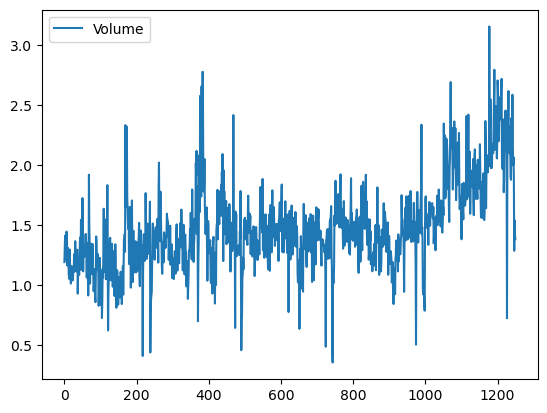

In [6]:
sMarket.plot(y = 'Volume')

## Logistic regression

In [7]:
allvars = sMarket.columns.drop(['Today', 'Direction', 'Year'])

allvars

Index(['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], dtype='object')

In [8]:
design = MS(allvars)

In [9]:
X = design.fit_transform(sMarket)

In [10]:
y = sMarket.Direction == 'Up' # Need to transform the categorical variable selectin the 'interest' class.

In [11]:
glm = sm.GLM(
                y,
                X,
                family = sm.families.Binomial()
)

In [12]:
results = glm.fit()

In [13]:
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [14]:
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [15]:
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [16]:
probs = results.predict()

In [17]:
probs[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [18]:
labels = np.array(['Down']*1250)

labels [probs > 0.5] = 'Up'

In [19]:
confusion_table(labels, sMarket.Direction)

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [20]:
np.mean(labels == sMarket.Direction)

0.5216

### Separate train and test data

In [21]:
train = (sMarket.Year < 2005)
sMarketTrain = sMarket.loc[train]
sMartetTest = sMarket.loc[~train]

In [22]:
XTrain, XTest = X.loc[train], X.loc[~train]
yTrain, yTest = y.loc[train], y.loc[~train]

In [23]:
glmTrain = sm.GLM(
                    yTrain,
                    XTrain,
                    family = sm.families.Binomial()
)

In [24]:
results = glmTrain.fit()

In [25]:
probs = results.predict(exog=XTest)

### Test model

In [26]:
D = sMarket['Direction']

In [27]:
LTrain, LTest = D.loc[train], D.loc[~train]

Theshold the probabilites in 0.5

In [28]:
threshold = 0.5

In [29]:
labels = np.array(['Down']*252)

In [30]:
labels[probs>threshold] = 'Up'

In [31]:
confusion_table(labels, LTest)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [32]:
np.mean(labels == LTest), np.mean(labels != LTest)

(0.4801587301587302, 0.5198412698412699)

### Model with non significant predictors

In [33]:
model = MS(['Lag1', 'Lag2']).fit(sMarket)

In [34]:
X = model.transform(sMarket)

In [35]:
XTrain , XTest = X.loc[train], X.loc[~train]
glm_train = sm.GLM(
                    yTrain ,
                    XTrain ,
                    family=sm.families.Binomial()
)
results = glm_train.fit()
probs = results.predict(exog=XTest)
labels = np.array(['Down']*252)
labels[probs >0.5] = 'Up'
confusion_table(labels , LTest)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


#### Predict

In [36]:
newData = pd.DataFrame(
                        {
                            'Lag1': [1.2, 1.5],
                            'Lag2': [1.1, -0.8]
                        }

)

newX = model.transform(newData)

results.predict(newX)

0    0.479146
1    0.496094
dtype: float64

## Linear discriminant analysis LDA

In [37]:
lda = LDA(store_covariance = True)

In [38]:
XTrain, XTest = [M.drop(columns = ['intercept'])
                     for M in [XTrain, XTest]]

In [39]:
lda.fit(XTrain, LTrain)

LinearDiscriminantAnalysis(store_covariance=True)

In [40]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [41]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [42]:
lda.priors_

array([0.49198397, 0.50801603])

In [43]:
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

In [44]:
lda_pred = lda.predict(XTest)

In [45]:
confusion_table(lda_pred, LTest)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [46]:
lda_prob = lda.predict_proba(XTest)

In [47]:
np.all(
        np.where(lda_prob[:,1] >= threshold, 'Up', 'Down') == lda_pred
)

True

In [48]:
# Problems with more than two classes

np.all(
        [
            lda.classes_[i] for i in np.argmax(lda_prob, 1)
        ] == lda_pred
)

True

## Quadratic discriminant analysis

In [49]:
qda = QDA(store_covariance = True)

In [50]:
qda.fit(XTrain, LTrain)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [51]:
qda.means_, qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [52]:
qda.covariance_[0]

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [53]:
qda_pred = qda.predict(XTest)

In [54]:
confusion_table(qda_pred, LTest)

Truth,Down,Up
Predicted,,
Down,30,20
Up,81,121


In [55]:
np.mean(qda_pred == LTest)

0.5992063492063492

## Naive Bayes

In [56]:
NB = GaussianNB()

In [57]:
NB.fit(XTrain, LTrain)

GaussianNB()

In [58]:
NB.classes_

array(['Down', 'Up'], dtype='<U4')

In [59]:
NB.class_prior_

array([0.49198397, 0.50801603])

In [60]:
NB.theta_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [61]:
NB.var_

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [62]:
XTrain[LTrain == 'Down'].mean()

Lag1    0.042790
Lag2    0.033894
dtype: float64

In [63]:
XTrain[LTrain == 'Down'].var(ddof = 0)

Lag1    1.503554
Lag2    1.532467
dtype: float64

In [64]:
nb_labels = NB.predict(XTest)

In [65]:
confusion_table(nb_labels, LTest)

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


## KNN

In [66]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [67]:
knn1.fit(XTrain , LTrain)
knn1_pred = knn1.predict(XTest)
confusion_table(knn1_pred , LTest)

Truth,Down,Up
Predicted,,
Down,43,58
Up,68,83


In [68]:
np.mean(knn1_pred == LTest)

0.5

In [69]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(XTrain , LTrain).predict(XTest)
np.mean(knn3_pred == LTest)

0.5317460317460317

### Using Caravan data

In [70]:
Caravan = load_data('Caravan')
Purchase = Caravan['Purchase']
Purchase.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [71]:
features =  Caravan.drop(columns = ['Purchase'])

#### Standardize data

In [72]:
# This code creates the scaler but not apply to data yet

scaler = StandardScaler(
                        with_mean = True,
                        with_std = True,
                        copy = True # Not do inplace
)

In [73]:
scaler.fit(features) # Stores the information from dataset at scaler (mean and sd)

StandardScaler()

In [74]:
Xstd = scaler.transform(features)

In [75]:
# Transform to pandas data frame

featuresStd = pd.DataFrame(Xstd, columns = features.columns)

featuresStd.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.680906,-0.27258,0.406697,-1.216964,0.779405,-0.694311,0.217444,-0.068711,-0.161816,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
1,0.992297,-0.27258,-0.859500,-1.216964,0.779405,0.302552,-0.365410,-0.068711,0.464159,-0.096077,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
2,0.992297,-0.27258,-0.859500,-1.216964,0.779405,-0.694311,-0.365410,0.914172,0.464159,-1.667319,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
3,-1.187437,-0.27258,0.406697,0.010755,-0.970980,1.299414,-0.948264,0.914172,0.464159,-0.619824,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
4,1.225840,-0.27258,1.672893,-1.216964,1.479559,0.302552,-0.365410,-0.068711,0.464159,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816


In [76]:
featuresStd.std()

MOSTYPE     1.000086
MAANTHUI    1.000086
MGEMOMV     1.000086
MGEMLEEF    1.000086
MOSHOOFD    1.000086
              ...   
AZEILPL     1.000086
APLEZIER    1.000086
AFIETS      1.000086
AINBOED     1.000086
ABYSTAND    1.000086
Length: 85, dtype: float64

### Separate on train and test

In [77]:
(XTrain, XTest, yTrain, yTest) = train_test_split(
                                                    featuresStd,
                                                    Purchase, 
                                                    test_size = 1000,
                                                    random_state = 0
)

#### Fit model to standardized data

In [78]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(XTrain , yTrain).predict(XTest)
np.mean(yTest != knn1_pred), np.mean(yTest != "No")

(0.111, 0.067)

In [79]:
confusion_table(knn1_pred, yTest)

Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


#### Tunning parameters

In [80]:
for K in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(XTrain , yTrain).predict(XTest)
    C = confusion_table(knn_pred, yTest)
    templ = ('K={0:d}: # predicted to rent: {1:>2},' +
             ' # who did rent {2:d}, accuracy {3:.1%}')
    pred = C.loc['Yes'].sum()
    did_rent = C.loc['Yes','Yes']
    print(templ.format(
                        K,
                        pred,
                        did_rent ,
                        did_rent / pred)
         )

K=1: # predicted to rent: 62, # who did rent 9, accuracy 14.5%
K=2: # predicted to rent:  6, # who did rent 1, accuracy 16.7%
K=3: # predicted to rent: 20, # who did rent 3, accuracy 15.0%
K=4: # predicted to rent:  4, # who did rent 0, accuracy 0.0%
K=5: # predicted to rent:  7, # who did rent 1, accuracy 14.3%


## Linear and Pisson Regression on Bikeshare data

In [81]:
bike = load_data('Bikeshare')

In [82]:
bike.shape, bike.columns

((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

### Linear regression

In [84]:
Xbike = MS(['mnth',
            'hr',
            'workingday',
            'temp',
            'weathersit']).fit_transform(bike)
Ybike = bike['bikers']
M_lm = sm.OLS(Ybike, Xbike).fit()
summarize(M_lm)

,coef,std err,t,P>|t|
intercept,-27.2068,6.715,-4.052,0.000
mnth[Aug],11.8181,4.698,2.515,0.012
mnth[Dec],5.0328,4.280,1.176,0.240
mnth[Feb],-34.5797,4.575,-7.558,0.000
mnth[Jan],-41.4249,4.972,-8.331,0.000
mnth[July],3.8996,5.003,0.779,0.436
mnth[June],26.3938,4.642,5.686,0.000
mnth[March],-24.8735,4.277,-5.815,0.000
mnth[May],31.1322,4.150,7.501,0.000
mnth[Nov],18.8851,4.099,4.607,0.000


#### Change encode of Hr and Month

In [85]:
hr_encode = contrast('hd', 'sum')

In [86]:
mnth_encode = contrast('mnth', 'sum')

In [87]:
X2 = MS([mnth_encode,
         mnth_encode,
         'workingday',
         'temp',
         'weathersit']).fit_transform(bike)

In [88]:
M2_lm = sm.OLS(Ybike, X2).fit()
S2 = summarize(M2_lm)
S2

,coef,std err,t,P>|t|
intercept,-8.843000e+01,6.853000e+00,-12.904,0.000
mnth[Jan],-6.632000e+13,1.550000e+14,-0.426,0.670
mnth[Feb],-1.628000e+13,3.900000e+13,-0.417,0.676
mnth[March],1.263000e+14,3.010000e+14,0.420,0.674
mnth[April],4.423000e+12,9.160000e+12,0.483,0.629
mnth[May],7.948000e+13,1.560000e+14,0.511,0.610
mnth[June],4.667000e+12,8.780000e+13,0.053,0.958
mnth[July],3.390000e+13,8.720000e+13,0.389,0.697
mnth[Aug],4.376000e+13,8.350000e+13,0.524,0.600
mnth[Sept],-6.390000e+12,7.490000e+13,-0.085,0.932


In [89]:
np.sum((M_lm.fittedvalues - M2_lm.fittedvalues)**2)

64685969.87557606

### Poison regression

In [90]:
M_pois = sm.GLM(
                Ybike,
                X2,
                family = sm.families.Poisson()
).fit()

In [94]:
S_pois = summarize(M_pois)

In [95]:
coef_month = S_pois[S_pois.index.str.contains('mnth')]['coef']
coef_month = pd.concat([coef_month ,
pd.Series([-coef_month.sum()],
          index=['mnth[Dec]'])]
)
coef_hr = S_pois[S_pois.index.str.contains('hr')]['coef']
coef_hr = pd.concat([coef_hr,
                     pd.Series([-coef_hr.sum()],
                               index=['hr[23]'])]
)

C:\Users\bacos1\AppData\Local\Temp\ipykernel_13128\4175459767.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_hr.set_xticklabels(range(24)[::2], fontsize =20)


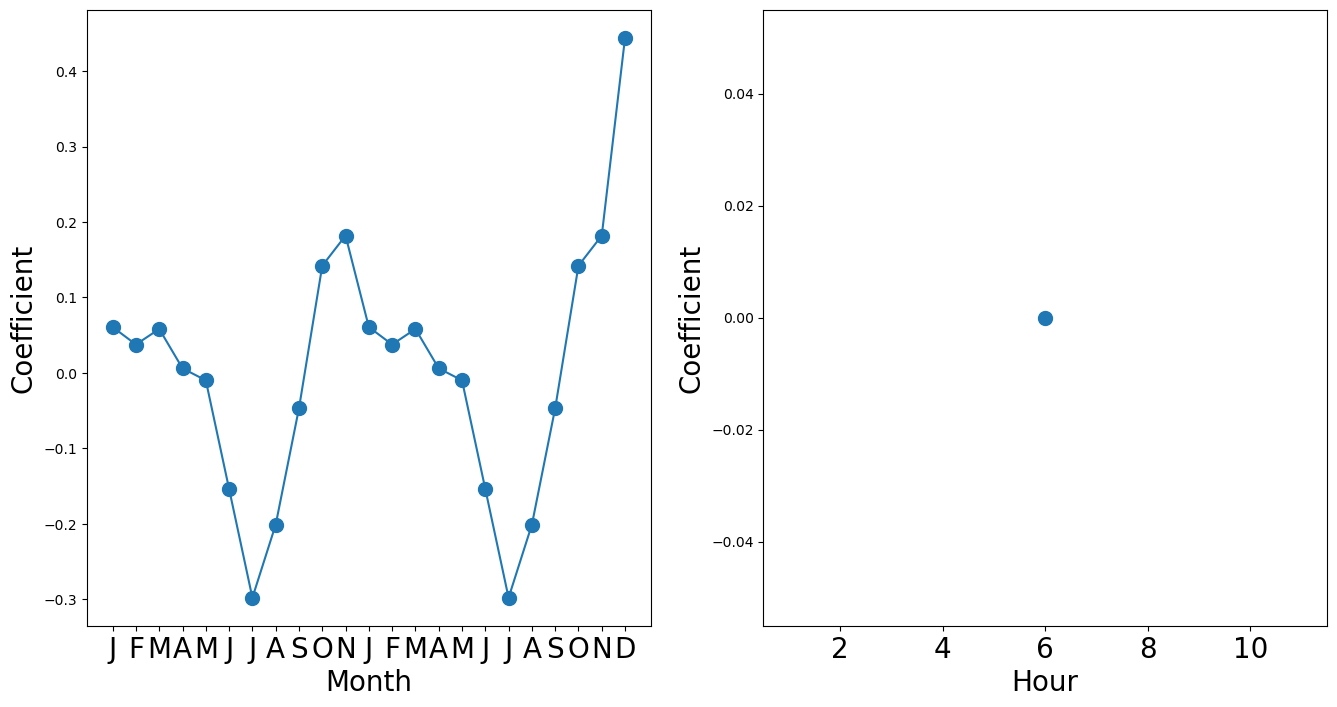

In [98]:
fig_pois , (ax_month , ax_hr) = subplots(1, 2, figsize=(16,8))
x_month = np.arange(coef_month.shape[0])
x_hr = np.arange(coef_hr.shape[0])
ax_month.plot(x_month , coef_month , marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize
=20)
ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20)
ax_hr.plot(x_hr , coef_hr , marker='o', ms=10)
ax_hr.set_xticklabels(range(24)[::2], fontsize =20)
ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20);